# Modelos de clasificación en modelos de aprendizaje supervisado    

A continuación, vamos a entrenar varias modelos de aprendizaje supervisado de clasificacion , tales como: 
*   Regresión logística. 
*   Naiven Bayes
*   Árboles de clasificación. 
*   Random Forest
*   Máquinas de soporte vectorial.
*   Redes neuronales 
posteriormente, seleccionaremos el mejor modelo según. 

In [1]:
import sys
import warnings

warnings.filterwarnings('ignore')

## Preprocesamiento  

Cargamos la base de datos. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler,OneHotEncoder



df=pd.read_csv('../Datos/obesity.csv')
df


,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Dividimos el conjunto de datos en un 80% para entrenar a los modelos y el restante para el testeo de los mismos.

In [3]:
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
objetivo_encoder = OrdinalEncoder(categories=[categories])
y=objetivo_encoder.fit(df[['NObeyesdad']])
Y=y.transform(df[['NObeyesdad']])
X=df.drop(['NObeyesdad'],axis=1)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
X_train

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1295,1295,Female,38.148845,1.557808,79.661693,yes,yes,2.000000,3.000000,Sometimes,no,1.274774,no,0.000000,0.000000,Sometimes,Automobile
1627,1627,Male,40.366238,1.722396,109.349025,yes,yes,2.281963,3.770379,Sometimes,no,1.000000,no,1.330519,0.000000,no,Automobile
1388,1388,Female,39.648946,1.572791,80.086524,yes,yes,2.071622,2.977909,Sometimes,no,1.468297,no,0.000000,0.000000,no,Automobile
1318,1318,Male,23.237302,1.761008,97.829344,yes,yes,2.000000,3.000000,Sometimes,no,2.988771,no,2.429923,1.978043,no,Public_Transportation
648,648,Female,22.547298,1.722461,51.881263,yes,yes,2.663421,3.000000,Frequently,no,1.041110,no,0.794402,1.391948,no,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1033,Male,19.671876,1.699474,78.000000,yes,no,1.925064,2.358298,Sometimes,no,2.774043,no,0.000000,0.133566,no,Public_Transportation
1731,1731,Male,30.554956,1.779136,120.600940,yes,yes,2.671238,3.000000,Sometimes,no,2.145368,no,0.882709,0.593917,Sometimes,Automobile
763,763,Male,21.000000,1.620000,70.000000,no,yes,2.000000,1.000000,no,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
835,835,Female,29.320380,1.642506,69.906708,yes,yes,2.366949,3.000000,Sometimes,no,1.926577,no,1.581242,0.000000,Sometimes,Automobile


In [4]:

        
variables_nominales = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
variables_ordinales = [ 'NCP', 'CH2O', 'FAF', 'TUE' ]
variables_ordinales2 = ['CAEC']
variables_ordinales3 = ['CALC']

variables_numericas = ['Age']
#objetivo = ['NObeyesdad']
categorical_encoder = OneHotEncoder(handle_unknown='ignore')

categories2=[['no', 'Sometimes', 'Frequently', 'Always']]
categorical_encoder = OneHotEncoder(handle_unknown='ignore')

numerical_pipe = MinMaxScaler()

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)


ordinal_encoder2 = OrdinalEncoder(categories=categories2,handle_unknown='use_encoded_value', unknown_value=-1)

preprocessing = ColumnTransformer(
    [
        ("Codificación de Categóricas", categorical_encoder, variables_nominales),
        ("Transformación de numéricas", numerical_pipe, variables_numericas),
        ("Codificación de ordinales",ordinal_encoder,variables_ordinales),
 #       ("Codificación de objetivo",objetivo_encoder,objetivo),
       ("Codificación de ordinales2",ordinal_encoder2,variables_ordinales2),
       ("Codificación de ordinales3",ordinal_encoder2,variables_ordinales3),
    ],
    verbose_feature_names_out=False,
)



flujo_preposesamiento= Pipeline(
    [
        ("Preprocesamiento", preprocessing)
         
    ]
)
flujo_preposesamiento.fit(X_train,Y_train)


Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(), ['Age']),
                                                 ('Codificación de ordinales',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_v...
                                                 ('Codificación de ordinales2',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['CAEC']),
                                                 ('Codificación de ordinales3',
                                                  OrdinalEncoder(categories=[['no',
                                                                              'Sometimes',
                                                                              'Frequently',
                                                                              'Always']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['CALC'])],
                                   verbose_feature_names_out=False))])

## Regresión Logística  

Para la regresión logística, haciendo un tuning de parámetros, encontramos que el mejor modelo, con respecto al accuracy de entrenamiento (0.5474), es el que tiene como parámetros {'C': 10000.0, 'max_iter': 3000, 'penalty': 'l2'} 

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parametros = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 4, 10),
    "max_iter": [1000, 2000, 3000],
}
RL = GridSearchCV(
    estimator=LogisticRegression(random_state=0),
    param_grid=parametros,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)

flujo_logistica= Pipeline(
    [
        ("Preprocesamiento", preprocessing),
        ("Modelo",RL),
         
    ]
)
flujo_logistica

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(), ['Age']),
                                                 ('Codificación de ordinales',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_v...
                                   verbose_feature_names_out=False)),
                ('Modelo',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=0),
                              n_jobs=-1,
                              param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                          'max_iter': [1000, 2000, 3000],
                                          'penalty': ['l1', 'l2']},
                              scoring='accuracy'))])

In [6]:
flujo_logistica.fit(X_train,Y_train)

/Users/williamcamilolopezvega/anaconda3/envs/ProyectoObesidad/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/williamcamilolopezvega/anaconda3/envs/ProyectoObesidad/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/williamcamilolopezvega/anaconda3/envs/ProyectoObesidad/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/williamcamilolopezvega/anaconda3/envs/ProyectoObesi

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(), ['Age']),
                                                 ('Codificación de ordinales',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_v...
                                   verbose_feature_names_out=False)),
                ('Modelo',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=0),
                              n_jobs=-1,
                              param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                          'max_iter': [1000, 2000, 3000],
                                          'penalty': ['l1', 'l2']},
                              scoring='accuracy'))])

In [7]:
RL=flujo_logistica["Modelo"]
mejor_modelo = RL.best_estimator_
mejores_parametros = RL.best_params_
mejor_modelo

LogisticRegression(C=10000.0, max_iter=3000, random_state=0)

In [8]:
mejores_parametros

{'C': 10000.0, 'max_iter': 3000, 'penalty': 'l2'}

In [9]:
flujo_logistica.score(X_train,Y_train)

0.5562796208530806

In [10]:
flujo_logistica.score(X_test,Y_test)

0.49645390070921985

In [13]:
from sklearn.inspection import permutation_importance
results=permutation_importance(flujo_logistica,X_test,Y_test,n_repeats=10,random_state=0)
importances = results.importances_mean


In [35]:

importances = permutation_importance(
    flujo_logistica, X_test, Y_test, n_repeats=10, random_state=0
)

sorted_importances_idx = Importacia_RL.importances_mean.argsort()
importances = pd.DataFrame(
    Importacia_RL.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
importances

,TUE,Unnamed: 0,Height,Weight,FCVC,SMOKE,CH2O,FAF,SCC,CALC,Age,CAEC,FAVC,MTRANS,family_history_with_overweight,NCP,Gender
0,0.016548,0.0,0.0,0.0,0.0,0.004728,-0.007092,0.002364,0.014184,0.028369,0.002364,0.023641,0.049645,0.068558,0.063830,0.063830,0.134752
1,0.000000,0.0,0.0,0.0,0.0,0.002364,0.007092,0.009456,0.016548,0.026005,0.026005,0.007092,0.042553,0.073286,0.063830,0.082742,0.144208
2,-0.011820,0.0,0.0,0.0,0.0,0.009456,0.004728,0.002364,0.016548,0.014184,0.014184,0.035461,0.037825,0.066194,0.073286,0.080378,0.132388
3,-0.021277,0.0,0.0,0.0,0.0,0.002364,0.004728,0.007092,0.026005,0.021277,0.023641,0.035461,0.030733,0.047281,0.066194,0.080378,0.158392
4,-0.007092,0.0,0.0,0.0,0.0,0.002364,0.002364,0.011820,0.021277,0.004728,0.028369,0.021277,0.047281,0.063830,0.037825,0.092199,0.132388
5,-0.009456,0.0,0.0,0.0,0.0,0.002364,0.009456,0.009456,0.026005,0.021277,0.030733,0.026005,0.023641,0.066194,0.066194,0.068558,0.139480
6,-0.002364,0.0,0.0,0.0,0.0,-0.007092,0.011820,-0.004728,0.018913,0.016548,0.023641,0.026005,0.028369,0.049645,0.073286,0.089835,0.122931
7,-0.002364,0.0,0.0,0.0,0.0,0.004728,0.007092,0.007092,0.007092,0.014184,0.023641,0.028369,0.063830,0.059102,0.052009,0.073286,0.148936
8,-0.004728,0.0,0.0,0.0,0.0,0.002364,0.002364,0.004728,0.023641,0.021277,0.018913,0.033097,0.052009,0.066194,0.059102,0.070922,0.172577
9,-0.002364,0.0,0.0,0.0,0.0,0.004728,-0.004728,0.002364,0.014184,0.033097,0.021277,0.042553,0.042553,0.070922,0.075650,0.080378,0.163121


In [38]:
importances.shape

(10, 17)

TypeError: unhashable type: 'numpy.ndarray'

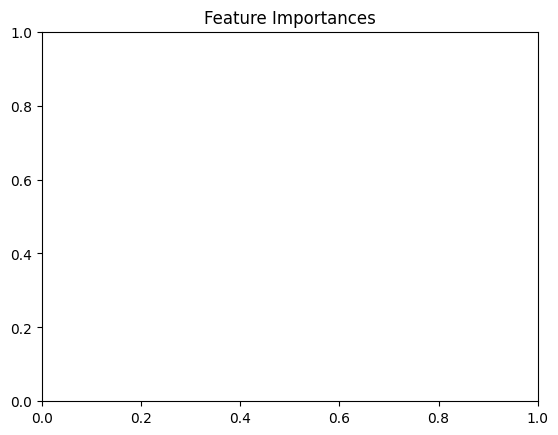

In [39]:
importances = permutation_importance(flujo_logistica,X_test,Y_test,n_repeats=10,random_state=0)
feature_names = X_train.columns
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

In [40]:
importances

{'importances_mean': array([ 0.        ,  0.14491726,  0.0212766 ,  0.        ,  0.        ,
         0.06312057,  0.04184397,  0.        ,  0.07825059,  0.02789598,
         0.00283688,  0.00378251,  0.01843972,  0.00520095, -0.00449173,
         0.02009456,  0.06312057]),
 'importances_std': array([0.        , 0.01491611, 0.00769684, 0.        , 0.        ,
        0.01078439, 0.01153558, 0.        , 0.00861831, 0.00926521,
        0.00392748, 0.00561435, 0.00567376, 0.00458409, 0.00918342,
        0.00771497, 0.00819278]),
 'importances': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.13475177,  0.14420804,  0.13238771,  0.15839243,  0.13238771,
          0.13947991,  0.12293144,  0.14893617,  0.17257683,  0.16312057],
        [ 0.00236407,  0.02600473,  0.0141844 ,  0.02364066,  0.02836879,
          0.03073286,  0.02364066,  0.02364066,  0.01891253,  0.0212766 ],
      

In [41]:
results = permutation_importance(
    flujo_logistica, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

In [45]:
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Print or visualize importance scores (e.g., bar chart using matplotlib)
print(f"Feature Importances (Descending Order):")
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance:.4f}")

Feature Importances (Descending Order):
Gender: 0.1423
NCP: 0.0865
family_history_with_overweight: 0.0667
MTRANS: 0.0546
FAVC: 0.0392
CAEC: 0.0260
CALC: 0.0187
Age: 0.0184
SCC: 0.0147
CH2O: 0.0069
FAF: 0.0052
TUE: 0.0038
SMOKE: 0.0033
FCVC: 0.0000
Weight: 0.0000
Height: 0.0000
Unnamed: 0: 0.0000


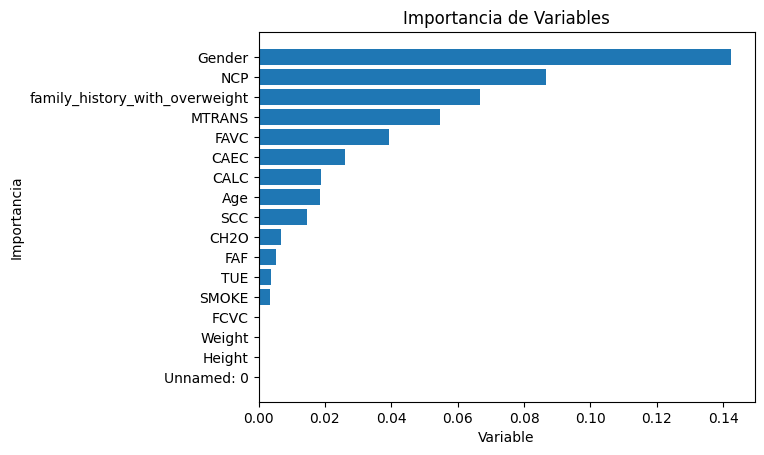

In [50]:
import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [51]:
from tabulate import tabulate

tabla = [
    ["Fila 1", "Columna 1"],
    ["Fila 2", "Columna 2"],
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════╤═══════════╕
│ Fila 1 │ Columna 1 │
├────────┼───────────┤
│ Fila 2 │ Columna 2 │
╘════════╧═══════════╛
